In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# calling dataset using pandas - read_excel()
df1 = pd.read_csv(r"C:\Users\ASUS\OneDrive\Documents\Projects\30 Days - 30 Python Projects\Students' Result Analysis Project\Expanded_data_with_more_features.csv")
print(df1.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [17]:
# summary of the main statistical details of the data
df1.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [18]:
# rundown of the column names, data types, non-null counts, and memory usage
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [27]:
# check the total number of null (missing) values in each column 
null_values = df1.isnull().sum()
print(null_values)

#The .isnull() part checks for missing values (shows True for missing and False for non-missing), 
#and then .sum() adds up all the True values for each column, giving you the total count of missing values.


Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64


In [20]:
# dropping unnamed column
df1 = df1.drop("Unnamed: 0", axis = 1)# axis=0 is for rows, and axis=1 is for columns
print(df1.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


In [21]:
# change weekly study hours column
# df1["WklyStudyHours"] = df1["WklyStudyHours"].str.replace("05-Oct","5-10")

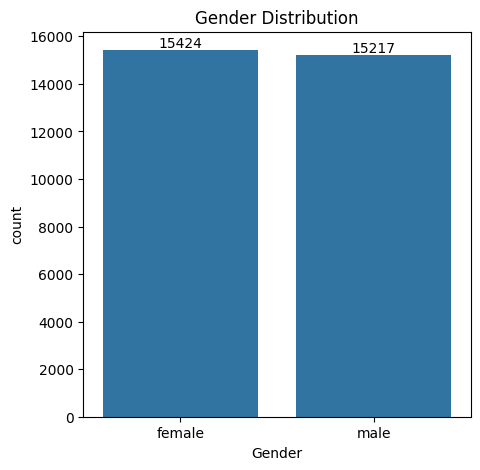

In [38]:
# gender distribution
plt.figure(figsize = (5,5)) # sets the size of the plot to be 5 inches wide and 5 inches tall
ax = sns.countplot(data = df1, x = "Gender") # creates a bar plot that shows the count of occurrences for each unique value
ax.bar_label(ax.containers[0]) # adds labels to the bars in the first container of the ax (axes) object
plt.title("Gender Distribution")
plt.show() # displays the plot

In [23]:
# From the above chart, we've analysed that the number of females in the data is more than the number of males.

In [24]:
#groups the data in df1 by ParentEduc and calculates the average for MathScore, ReadingScore, and WritingScore
gb = df1.groupby("ParentEduc").agg({"MathScore":"mean", "ReadingScore":"mean", "WritingScore":"mean"})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


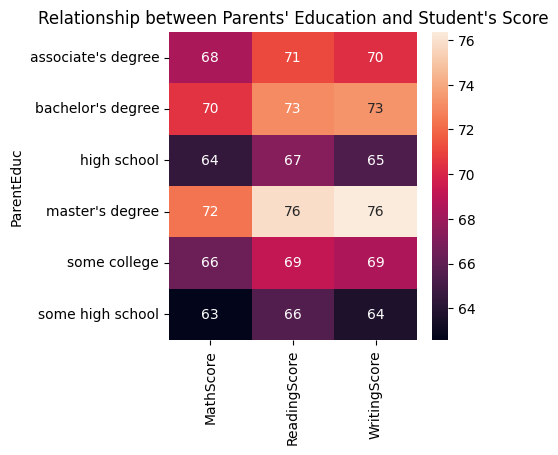

In [39]:
#whenever, there is data in string and numeric, use heatmap to visualize it better
plt.figure(figsize = (4,4))
sns.heatmap(gb, annot = True) #annot for the labels
plt.title("Relationship between Parents' Education and Student's Score")
plt.show()
#A heatmap visualizes data in a grid format where 
#each cell's color represents a value, making it easy to spot patterns, correlations, or outliers in your dataset.

In [33]:
# From the above chart, we've observed that the parents' level of education positively influences their children's academic performance.

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


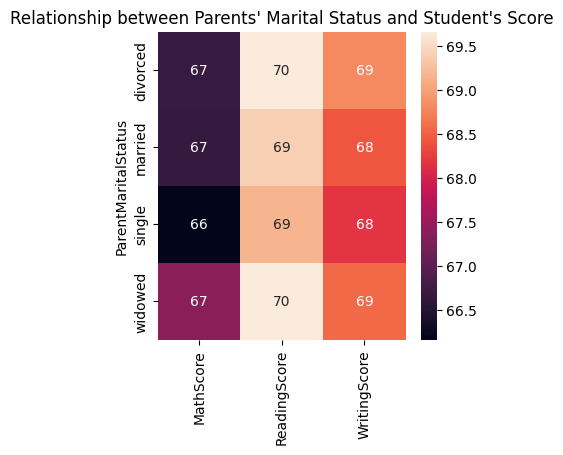

In [44]:
#groups the data in df1 by ParentEduc and calculates the average for MathScore, ReadingScore, and WritingScore
gb1 = df1.groupby("ParentMaritalStatus").agg({"MathScore":"mean", "ReadingScore":"mean", "WritingScore":"mean"})
print(gb1)
plt.figure(figsize = (4,4))
sns.heatmap(gb1, annot = True) 
plt.title("Relationship between Parents' Marital Status and Student's Score")
plt.show()

In [41]:
# From the above chart, we can conclude that the parents' marital status has no/negligible influence on their children's academic performance.

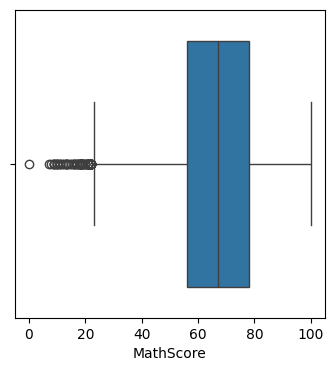

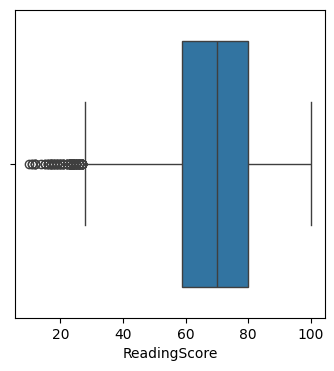

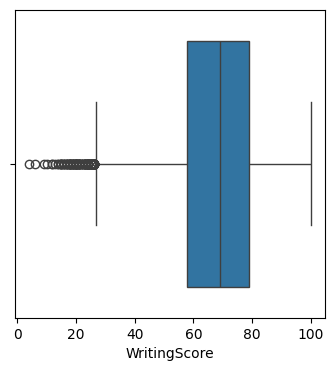

In [45]:
# Detecting outliers using boxplot
plt.figure(figsize = (4,4))
sns.boxplot(data = df1, x = "MathScore")
plt.show()

plt.figure(figsize = (4,4))
sns.boxplot(data = df1, x = "ReadingScore")
plt.show()

plt.figure(figsize = (4,4))
sns.boxplot(data = df1, x = "WritingScore")
plt.show()

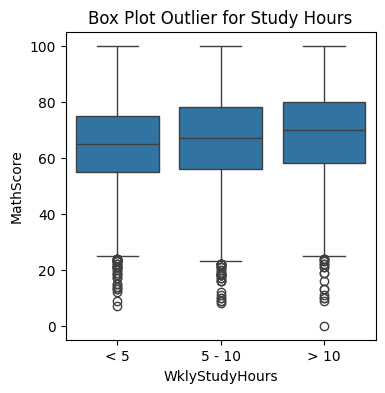

In [50]:
plt.figure(figsize=(4,4))
sns.boxplot(data=df1,x="WklyStudyHours",y="MathScore")
plt.title("Box Plot Outlier for Study Hours")
plt.show()

In [ ]:
# From this Box Plot we found that the student who scored zero in Maths used to study for more than 10 Hours. 


In [47]:
print(df1["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


[2219, 5826, 9212, 7503, 4041]


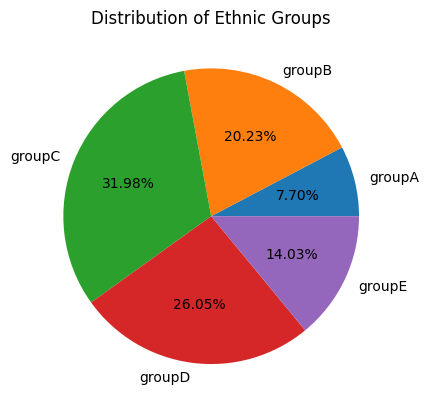

In [60]:
# Distribution of Ethnic Groups
#pie chart for percentage distribution
# loc is used to access rows and columns in a DataFrame by labels or boolean conditions
groupA = df1.loc[(df1['EthnicGroup'] == "group A")].count() 
# Filters the DataFrame to include only rows where EthnicGroup is "group A", and .count() counts the non-null values in each column for that group
groupB = df1.loc[(df1['EthnicGroup'] == "group B")].count() 
groupC = df1.loc[(df1['EthnicGroup'] == "group C")].count() 
groupD = df1.loc[(df1['EthnicGroup'] == "group D")].count() 
groupE = df1.loc[(df1['EthnicGroup'] == "group E")].count() 

#print(groupA["EthnicGroup"]) will only give the count

l = ["groupA", "groupB", "groupC", "groupD", "groupE"]
mlist = [groupA["EthnicGroup"], groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"], groupE["EthnicGroup"]]
print(mlist)
plt.pie(mlist, labels = l, autopct = "%1.2f%%") 
# Automtic Percetage (autopct) formats the percentage values displayed on a pie chart. %1.2f 
#means showing the percentage with two decimal places. The %% is used to include the percent sign in the label.
plt.title("Distribution of Ethnic Groups")
plt.show()

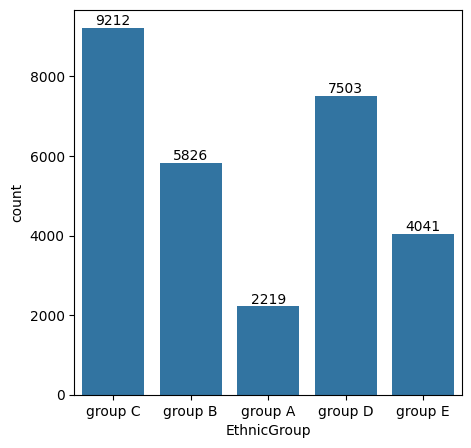

In [61]:
plt.figure(figsize = (5,5)) 
ax = sns.countplot(data = df1, x = "EthnicGroup") 
ax.bar_label(ax.containers[0])
plt.show() 